# Assignment 1

## Guidelines

> Remember that this is a code notebook - add an explanation of what you do using text boxes and markdown, and comment your code.
>
> If you re-use a substantial portion of code you find online, e.g on Stackoverflow, you need to add a link to it and make the borrowing explicit. The same applies of you take it and modify it, even substantially. There is nothing bad in doing that, providing you are acknowledging it and make it clear you know what you're doing. Similarly, if you make use of generative language models (e.g. ChatGPT) to draft your answer, you must acknowledge this and include the prompts used to obtain that output. Again, your answer should be sufficiently commented and described to show that you understand your code.
>
> Make sure your notebooks have been run when you submit, as I won't run them myself. Submit both the `.ipynb` file along with an `.html` export of the same. Submit all necessary auxilliary files as well. Please compress your submission into a `.zip` archive. Only `.zip` files can be submitted.
> If you are using Google Colab, here is a tutorial for obtaining an HTML export: https://stackoverflow.com/questions/53460051/convert-ipynb-notebook-to-html-in-google-colab .
>
> With Jupyter, you can simply export it as HTML through the File menu.

---

# Warm up (20 points)

## Question 1 (2 points)

Explain why `list1` and `list2` behave differently when they are passed to the `append_to_nested_list()` function.

In [15]:
def append_to_nested_list(a_list):
    a_list[0].append("Python")
    return a_list
    
list1 = [[], [], []]
list2 = [[]] * 3

print(append_to_nested_list(list1))
print(append_to_nested_list(list2))

[['Python'], [], []]
[['Python'], ['Python'], ['Python']]


list1 creates a list that contains three separate empty list and each inner list has its own reference in memory, whereas list2 creates three inner list that point to the same object in memory. Hence, that is why we see list1 returns with one Python recorded in one of the inner list, whereas list2 has Python in all of the inner lists

## Question 2 (2 points)

Write a function that counts the total frequency of words that start and end with the same character (e.g. comic) in a text file and test it on `data/melville-md.txt`. 

Ensure that the words are treated case-insensitive.

In [43]:
import re
from collections import Counter

def frequency_same_character(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        text = file.read()
    text = re.sub(r'\b-\b|\n', ' ', text)     # Remove hyphens and line breaks within words
    words = re.findall(r'\b[A-Za-z]+\b', text.lower())   # Tokenize the text into words, excluding numbers
    
    # Count the frequency of words starting and ending with the same character
    filtered_words = [word for word in words if len(word) >= 2 and word[0] == word[-1]]
    word_frequency = Counter(filtered_words)

    return word_frequency

# occurences report
result = frequency_same_character('data/melville-md.txt')
for word, frequency in result.items():
    print(f"{word}: {frequency}")


gutenberg: 94 occurrences
www: 6 occurrences
david: 2 occurrences
nightgown: 2 occurrences
wheelbarrow: 4 occurrences
going: 90 occurrences
squires: 4 occurrences
surmises: 4 occurrences
scenes: 12 occurrences
stars: 14 occurrences
heidelburgh: 9 occurrences
armada: 2 occurrences
schools: 9 occurrences
schoolmasters: 3 occurrences
epilogue: 2 occurrences
text: 6 occurrences
that: 3100 occurrences
wallow: 3 occurrences
stalls: 1 occurrences
statements: 5 occurrences
glancing: 14 occurrences
eye: 88 occurrences
thought: 150 occurrences
sometimes: 87 occurrences
sadness: 2 occurrences
subs: 1 occurrences
ships: 87 occurrences
sides: 28 occurrences
sleeps: 7 occurrences
described: 9 occurrences
seas: 87 occurrences
swims: 8 occurrences
seems: 87 occurrences
spouts: 16 occurrences
gaping: 3 occurrences
edge: 8 occurrences
shoulders: 13 occurrences
asia: 5 occurrences
africa: 8 occurrences
elbe: 1 occurrences
did: 258 occurrences
swiftness: 6 occurrences
america: 12 occurrences
sylphs: 1 occ

## Question 3 (2 points)

Rewrite the following code such that:

- the sequence of fruit names are randomly presented (without replacement). Use a function in the [random](https://docs.python.org/3.7/library/random.html) module for this.


- the article "an" is used when a fruit name begins with a vowel.

In [17]:
import random

available_fruit = ['apple', 'apricot', 'avocado', 'banana', 'bilberry', 'blackberry', 'blackcurrant', 'blueberry', 'boysenberry', 'currant', 'cherry', 'cherimoya', 'cloudberry', 'coconut', 'cranberry', 'cucumber', 'damson', 'date', 'dragonfruit', 'durian', 'elderberry', 'feijoa', 'fig', 'gooseberry', 'grape', 'raisin', 'grapefruit', 'guava', 'honeyberry', 'huckleberry', 'jabuticaba', 'jackfruit', 'jambul', 'jujube', 'kiwano', 'kiwifruit', 'kumquat', 'lemon', 'lime', 'loquat', 'longan', 'lychee', 'mango', 'mangosteen', 'marionberry', 'melon', 'cantaloupe', 'honeydew', 'watermelon', 'mulberry', 'nectarine', 'nance', 'orange', 'clementine', 'mandarine', 'tangerine', 'papaya', 'passionfruit', 'peach', 'pear', 'persimmon', 'physalis', 'plantain', 'plum', 'prune', 'pineapple', 'plumcot', 'pomegranate', 'pomelo', 'quince', 'raspberry', 'salmonberry', 'rambutan', 'redcurrant', 'salak', 'satsuma', 'soursop', 'strawberry', 'tamarillo', 'tamarind', 'yuzu']

random.shuffle(available_fruit)     # returns a random fruit 

for fruit in available_fruit:
    article = 'an' if fruit[0].lower() in {'a', 'e', 'i', 'o', 'u'} else 'a'
    print("A " + fruit)

A plum
A loquat
A blackberry
A cranberry
A salmonberry
A tamarillo
A raspberry
A raisin
A jackfruit
A blackcurrant
A mango
A lime
A cherimoya
A clementine
A melon
A lemon
A mulberry
A jambul
A mandarine
A plantain
A tamarind
A kiwano
A rambutan
A watermelon
A soursop
A physalis
A papaya
A elderberry
A strawberry
A mangosteen
A pineapple
A grape
A marionberry
A grapefruit
A satsuma
A prune
A bilberry
A feijoa
A currant
A guava
A nance
A durian
A lychee
A honeyberry
A pomegranate
A yuzu
A blueberry
A cucumber
A pomelo
A nectarine
A dragonfruit
A cherry
A persimmon
A plumcot
A orange
A coconut
A redcurrant
A longan
A huckleberry
A apricot
A tangerine
A passionfruit
A pear
A cloudberry
A date
A kumquat
A damson
A jujube
A banana
A avocado
A salak
A fig
A cantaloupe
A gooseberry
A boysenberry
A apple
A kiwifruit
A quince
A jabuticaba
A peach
A honeydew


## Question 4 (5 points)

The following code has been written to extract all word-initial consonant clusters in a text (e.g. "br" in "bread). Each sequence is obtained by matching any sequence of letters that does not include 'aeiou' and that occurs after a whitespace or the start of the line and that consists of 2 or more such characters.

It works by reading an input file line by line, and finding all matches of a regular expression in this line (case insensitive).

Unfortunately, the method only counts, and we do not find out which word-initial consonants are present in the text. Can you find a way to save all matching consonant clusters to the dictionary named "consonantclusters" with their frequency as the value, and then print this dictionary? Note that there can be multiple results per line. Try to avoid capturing the space(s) before the consonant cluster also.

Solutions where you adapt the provided regular expression will get more points than non-regex solutions, but you can try a non-regex solution if you are stuck.

**Possible extra:** Print the consonant clusters sorted by frequency and in a nice looking way.

In [18]:
import codecs
import re

consonantclusters = {}
consonantclustercount = 0

with codecs.open("data/melville-md.txt", "r", encoding="utf8") as infile:
    consonantclusterregex = re.compile(r'(^|\s)(?:(?![aeiouy])[a-z]){2,}')
    for line in infile:
        result = consonantclusterregex.findall(line.lower())
        if result:
            consonantclustercount += len(result)
            for cluster in result:
                consonantclusters[cluster] = consonantclusters.get(cluster, 0) + 1
print(consonantclustercount)

# Print the total count of word-initial consonant clusters
print("Total word-initial consonant clusters count:", consonantclustercount)

# Print the dictionary of consonant clusters with their frequencies
print("\nConsonant Clusters and Frequencies:")
for cluster, frequency in sorted(consonantclusters.items(), key=lambda x: x[1], reverse=True):
    print(f"'{cluster}' - Frequency: {frequency}")

51523
Total word-initial consonant clusters count: 51523

Consonant Clusters and Frequencies:
' ' - Frequency: 47026
'' - Frequency: 4497


## Question 5 (9 points)

Please use the frequencies in `late_arrival_causes` to create a duplicate of the plot below, as close as possible. This is called a Pareto chart.

Note: the line plot above the bars shows the cumulative frequency.

**Possible extra:** suggest, motivate and implement an alternative visualization for the same data.

![pareto chart](images/pareto-chart.png)

In [19]:
late_arrival_causes = {"Child Care" : 44, "Emergency" : 7, "Overslept" : 11, "Traffic" : 56, "Transp." : 27, "Weather" : 20}

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'Traffic'),
  Text(1, 0, 'Child Care'),
  Text(2, 0, 'Transp.'),
  Text(3, 0, 'Weather'),
  Text(4, 0, 'Overslept'),
  Text(5, 0, 'Emergency')])

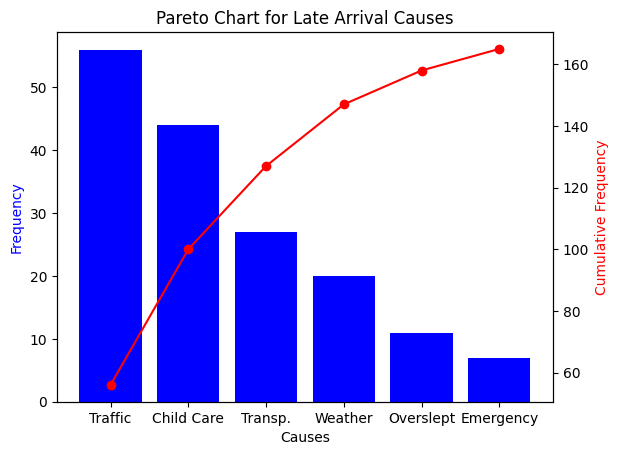

In [20]:
import matplotlib.pyplot as plt

late_arrival_causes = {"Child Care": 44, "Emergency": 7, "Overslept": 11, "Traffic": 56, "Transp.": 27, "Weather": 20}

# Sort the causes by frequency in descending order
sorted_causes = sorted(late_arrival_causes.items(), key=lambda x: x[1], reverse=True)

# Calculate cumulative frequencies
cumulative_frequencies = [sorted_causes[0][1]]
for cause, frequency in sorted_causes[1:]:
    cumulative_frequencies.append(cumulative_frequencies[-1] + frequency)

# plotting results
fig, ax1 = plt.subplots()

# Bar plot for frequencies
ax1.bar([cause[0] for cause in sorted_causes], [cause[1] for cause in sorted_causes], color='b')

# Line plot for cumulative frequencies
ax2 = ax1.twinx()
ax2.plot([cause[0] for cause in sorted_causes], cumulative_frequencies, color='r', marker='o')

ax1.set_xlabel('Causes')
ax1.set_ylabel('Frequency', color='b')
ax2.set_ylabel('Cumulative Frequency', color='r')
plt.title('Pareto Chart for Late Arrival Causes')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha="right")

# Show the plot
#plt.show()


---

# Preprocessing pipelines (30 points)

## Question 6 (20 points)

- Download a 19th-century edition (or earlier, but not later!) of a book you like from the [Internet Archive](https://archive.org) in `.txt` format. For example, [Frankenstein](https://archive.org/details/ghostseer01schiuoft/page/n6). Add the link to the edition you used to your answer, as well as the `.txt` file to your submission.

- Write code that:

    1. Reads the text in memory.
    
    1. Pre-processes the text with a tokenizer from [NLTK](https://www.nltk.org/api/nltk.tokenize.html) (remember to motivate your choice of tokenizer) and optionally other preprocessing steps if you feel this helps.
    
    1. Filter out words that consist of strictly less than 4 alphabetic characters.

    1. Counts the frequencies of all the words in the corpus (words should be counted case-insensitive).

    1. Writes each word-frequency pair to a csv file (from most frequent to rarest).

*Briefly* comment on your results, especially looking at very frequent and very infrequent words. What is problematic about processing these old editions? Can you find some limitations of the tokenizer in use, and think about how you would improve on it? Naturally, this part is required for full points.

**Possible extra:** plot the relative frequency of the top N words (e.g., use the Pareto chart you did above, or another suitable plot) and discuss whether the distribution might follow the [Zipf's law](https://en.wikipedia.org/wiki/Zipf%27s_law).

**Possible extra:** add lemmatization or stemming and part-of-speech tagging.

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/giamihuynh/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


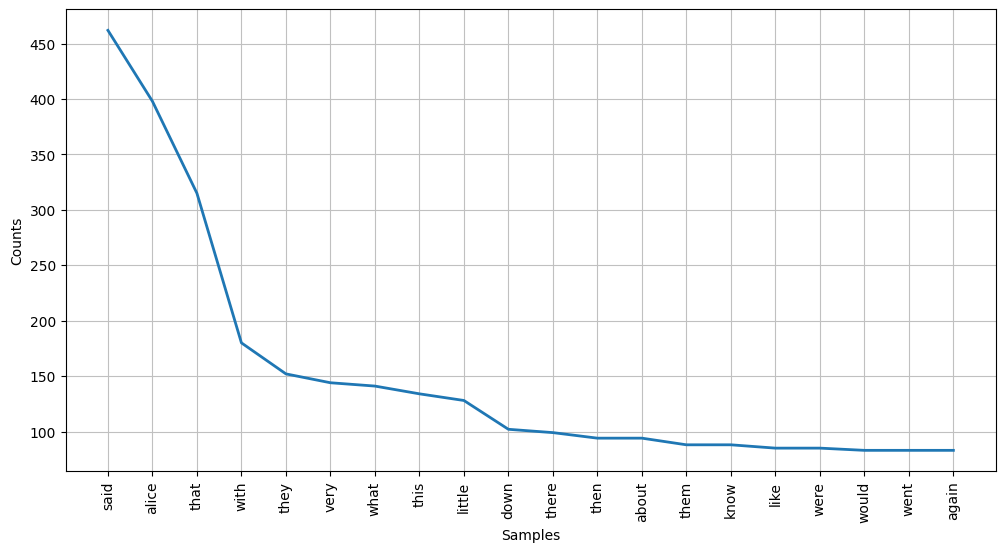

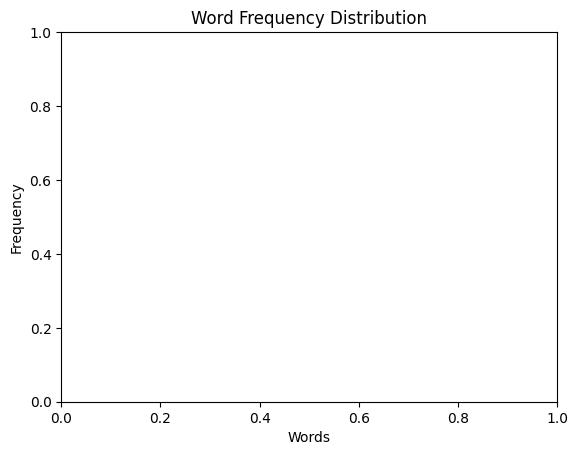

In [30]:
import nltk
import csv
from nltk.tokenize import RegexpTokenizer
from nltk.probability import FreqDist
import matplotlib.pyplot as plt

# Download NLTK resources (if not already downloaded)
nltk.download("punkt")

def preprocess_text(text):
    # Tokenization using NLTK's RegexpTokenizer
    tokenizer = RegexpTokenizer(r'\b\w+\b')
    tokens = tokenizer.tokenize(text)
    
    # Filter out words with less than 4 alphabetic characters
    filtered_tokens = [word.lower() for word in tokens if word.isalpha() and len(word) >= 4]
    
    return filtered_tokens

def count_word_frequencies(tokens):
    # Count word frequencies using NLTK's FreqDist
    freq_dist = FreqDist(tokens)
    return freq_dist

def write_to_csv(freq_dist, csv_filename):
    # Write word-frequency pairs to a CSV file (sorted by frequency)
    sorted_freq_dist = sorted(freq_dist.items(), key=lambda x: x[1], reverse=True)
    
    with open(csv_filename, mode='w', newline='', encoding='utf-8') as csv_file:
        writer = csv.writer(csv_file)
        writer.writerow(['Word', 'Frequency'])
        writer.writerows(sorted_freq_dist)

def plot_word_frequency_distribution(freq_dist, top_n=20):
    # Plot the relative frequency of the top N words
    plt.figure(figsize=(12, 6))
    freq_dist.plot(top_n, cumulative=False)
    plt.title('Word Frequency Distribution')
    plt.xlabel('Words')
    plt.ylabel('Frequency')
    plt.show()

# Replace '/Users/giamihuynh/AUC_TMCI_2021/Assignments/assignment_1/data/alice-wonderland_djvu.txt' with the actual path
with open('/Users/giamihuynh/AUC_TMCI_2021/Assignments/assignment_1/data/alice-wonderland_djvu.txt', 'r', encoding='utf-8') as file:
    corpus_text = file.read()

# Preprocess the text
preprocessed_tokens = preprocess_text(corpus_text)

# Count word frequencies
word_frequencies = count_word_frequencies(preprocessed_tokens)

# Write to CSV
write_to_csv(word_frequencies, 'word_frequencies_alice.csv')

# Plot word frequency distribution
plot_word_frequency_distribution(word_frequencies)


## Question 7 (10 points)

Do some self-learning: implement the same pipeline of question 6 using [spaCy pipelines](https://spacy.io/usage/processing-pipelines).

Hint: Make sure to know what Spacy does by default when loading specific models, the defaults are not always what you need.

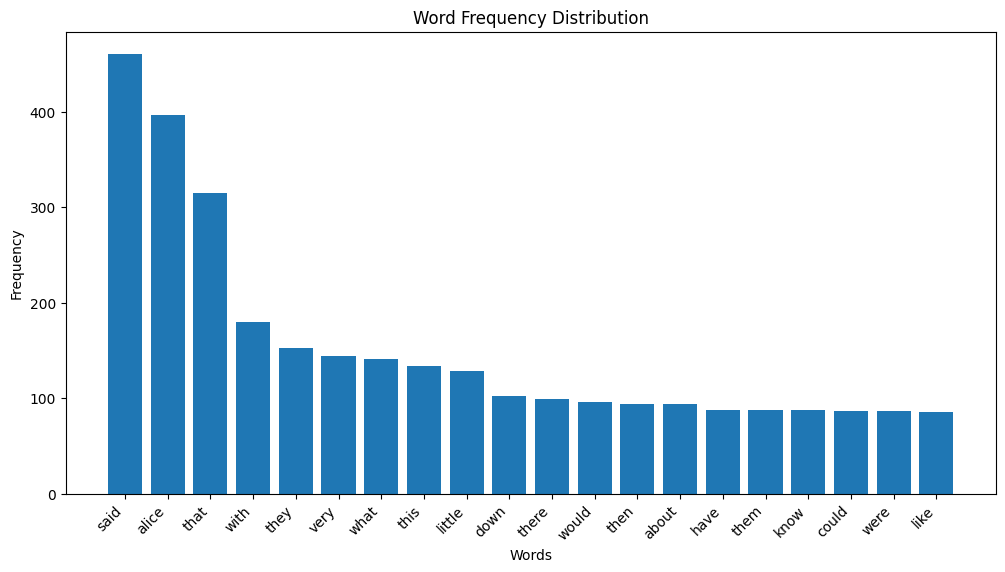

In [33]:
import spacy
import csv
from spacy.lang.en import English
from spacy.tokens import Doc
from collections import Counter
import matplotlib.pyplot as plt

# Load spaCy English language model
nlp = spacy.load("en_core_web_sm")

def preprocess_text_spacy(text):
    # Process the text using spaCy
    doc = nlp(text)
    
    # Filter out words with less than 4 alphabetic characters
    filtered_tokens = [token.text.lower() for token in doc if token.is_alpha and len(token.text) >= 4]
    
    return filtered_tokens

def count_word_frequencies_spacy(tokens):
    # Count word frequencies using Counter
    freq_counter = Counter(tokens)
    return freq_counter

def write_to_csv_spacy(freq_counter, csv_filename):
    # Write word-frequency pairs to a CSV file (sorted by frequency)
    sorted_freq_counter = freq_counter.most_common()
    
    with open(csv_filename, mode='w', newline='', encoding='utf-8') as csv_file:
        writer = csv.writer(csv_file)
        writer.writerow(['Word', 'Frequency'])
        writer.writerows(sorted_freq_counter)

def plot_word_frequency_distribution_spacy(tokens, top_n=20):
    # Plot the relative frequency of the top N words
    freq_counter = Counter(tokens)
    most_common = freq_counter.most_common(top_n)
    
    labels, values = zip(*most_common)
    plt.figure(figsize=(12, 6))
    plt.bar(labels, values)
    plt.title('Word Frequency Distribution')
    plt.xlabel('Words')
    plt.ylabel('Frequency')
    plt.xticks(rotation=45, ha='right')
    plt.show()

# Replace 'path/to/your/alice-wonderland_djvu.txt' with the actual path
with open('/Users/giamihuynh/AUC_TMCI_2021/Assignments/assignment_1/data/alice-wonderland_djvu.txt', 'r', encoding='utf-8') as file:
    corpus_text_spacy = file.read()

# Preprocess the text using spaCy
preprocessed_tokens_spacy = preprocess_text_spacy(corpus_text_spacy)

# Count word frequencies using spaCy
word_frequencies_spacy = count_word_frequencies_spacy(preprocessed_tokens_spacy)

# Write to CSV
write_to_csv_spacy(word_frequencies_spacy, 'word_frequencies_spacy.csv')

# Plot word frequency distribution using spaCy
plot_word_frequency_distribution_spacy(preprocessed_tokens_spacy)


---

# Descriptive text analysis (20 points)

## Question 8 (20 points)

In the `data/numan` directory, there are lyrics of some songs from two albums by electronic music pioneer Gary Numan. There are 5 songs from his 1979 album and 5 songs from his 2017 album.  This data was acquired from [Genius](https://genius.com) (Genius Lyrics) using their API, something that you could do too using the lyricsgenius package for Python!

- Load the data from these files into an appropriate data structure and perform appropriate preprocessing. 

*Hint: This might be a good opportunity to show how good you were at writing re-usable code in the previous questions.*

- Write a function that can return some statistics about an albums' song lyrics, and run this function for both albums:

    * Most frequent words
    * Type to token ratio (unique words/words)
    * Average word length
    * Longest and shortests songs (by lyrics)
    * What are the songs with the largest vocabulary and smallest vocabulary?
    
- Print these results to your notebook for both albums in a nice looking way. Then, also show these same statistics for just the song 'Cars' from the 1979 album, which was Gary Numan's most famous song.
   
   * Write down your interpretation of these results in this notebook.  
   * In which of the two time periods was Gary Numan more verbose? Back it with some evidence.
   * Electronic music is sometimes said to make more use of repetition than other forms of music. In which of the two time periods did Gary Numan make more use of lyrical repetition? You can either argue your case based on the numbers you were asked to calculate, or you can come up with your own definition of 'repetitiveness' and calculate it with Python code.

In [26]:
import os
import re
from collections import Counter

def load_lyrics(directory):
    lyrics_data = {}

    for album_title in os.listdir(directory):
        album_path = os.path.join(directory, album_title)

        if os.path.isdir(album_path):
            lyrics_data[album_title] = {}
            for filename in os.listdir(album_path):
                song_title, extension = os.path.splitext(filename)
                if extension == ".txt":
                    with open(os.path.join(album_path, filename), "r", encoding="utf-8") as file:
                        lyrics_data[album_title][song_title] = file.read()

    return lyrics_data

# Load lyrics for both albums
numan_lyrics = load_lyrics("data/numan")

def preprocess_lyrics(lyrics):
    # Tokenization and lowercasing
    words = re.findall(r'\b\w+\b', lyrics.lower())
    return words

def calculate_lyrics_statistics(lyrics_data, album_title, song_title=None):
    if song_title is not None:
        print(f"\nStatistics for the song '{song_title}' from {album_title} Album:")
        lyrics = lyrics_data[album_title][song_title]
    else:
        print(f"\nStatistics for {album_title} Album:")
        lyrics = " ".join(lyrics_data[album_title].values())
    
    preprocessed_lyrics = preprocess_lyrics(lyrics)
    
    # Most frequent words
    word_counts = Counter(preprocessed_lyrics)
    most_frequent_words = word_counts.most_common(5)
    print("Most Frequent Words:")
    for word, count in most_frequent_words:
        print(f"{word}: {count}")

    # Type to token ratio
    type_to_token_ratio = len(set(preprocessed_lyrics)) / len(preprocessed_lyrics)
    print(f"Type to Token Ratio: {type_to_token_ratio:.2f}")

    # Average word length
    average_word_length = sum(len(word) for word in preprocessed_lyrics) / len(preprocessed_lyrics)
    print(f"Average Word Length: {average_word_length:.2f}")

    # Longest and shortest songs (by lyrics)
    longest_song = max(lyrics_data[album_title], key=lambda song: len(preprocess_lyrics(lyrics_data[album_title][song])))
    shortest_song = min(lyrics_data[album_title], key=lambda song: len(preprocess_lyrics(lyrics_data[album_title][song])))
    print(f"Longest Song: '{longest_song}' (Length: {len(preprocess_lyrics(lyrics_data[album_title][longest_song]))} words)")
    print(f"Shortest Song: '{shortest_song}' (Length: {len(preprocess_lyrics(lyrics_data[album_title][shortest_song]))} words)")

# Songs with largest and smallest vocabulary
    largest_vocabulary_song = max(lyrics_data[album_title], key=lambda song: len(set(preprocess_lyrics(lyrics_data[album_title][song]))))
    smallest_vocabulary_song = min(lyrics_data[album_title], key=lambda song: len(set(preprocess_lyrics(lyrics_data[album_title][song]))))
    print(f"Largest Vocabulary Song: '{largest_vocabulary_song}' (Vocabulary Size: {len(set(preprocess_lyrics(lyrics_data[album_title][largest_vocabulary_song])))})")
    print(f"Smallest Vocabulary Song: '{smallest_vocabulary_song}' (Vocabulary Size: {len(set(preprocess_lyrics(lyrics_data[album_title][smallest_vocabulary_song])))})")

# Load lyrics for both albums
numan_lyrics = load_lyrics("data/numan")

# Calculate statistics for both albums
calculate_lyrics_statistics(numan_lyrics, "1979_pleasureprinciple")
calculate_lyrics_statistics(numan_lyrics, "2017_savage")

# Calculate statistics for 'Cars' song from 1979 album
calculate_lyrics_statistics(numan_lyrics, "1979_pleasureprinciple", "cars")


Statistics for 1979_pleasureprinciple Album:
Most Frequent Words:
i: 33
my: 29
we: 25
you: 23
are: 20
Type to Token Ratio: 0.35
Average Word Length: 3.56
Longest Song: 'metal' (Length: 137 words)
Shortest Song: 'cars' (Length: 88 words)
Largest Vocabulary Song: 'metal' (Vocabulary Size: 86)
Smallest Vocabulary Song: 'engineers' (Vocabulary Size: 31)

Statistics for 2017_savage Album:
Most Frequent Words:
i: 90
you: 65
the: 56
when: 44
and: 41
Type to Token Ratio: 0.23
Average Word Length: 3.64
Longest Song: 'theendofthings' (Length: 319 words)
Shortest Song: 'mynameisruin' (Length: 244 words)
Largest Vocabulary Song: 'theendofthings' (Vocabulary Size: 134)
Smallest Vocabulary Song: 'mynameisruin' (Vocabulary Size: 49)

Statistics for the song 'cars' from 1979_pleasureprinciple Album:
Most Frequent Words:
in: 8
i: 7
my: 6
here: 4
car: 4
Type to Token Ratio: 0.57
Average Word Length: 3.47
Longest Song: 'metal' (Length: 137 words)
Shortest Song: 'cars' (Length: 88 words)
Largest Vocabula